## Thư viện NumPy và SymPy

[`NumPy`](https://numpy.org/) là thư viện tính toán **số** (numeric).

[`SymPy`](https://www.sympy.org/en/index.html) là thư viện xử lý **ký hiệu** (symbolic).

In [1]:
import numpy as np
import sympy as sp
sp.init_printing()

In [2]:
x = np.sqrt(8)
y = sp.sqrt(8)
x, y

In [3]:
print(x**2 == 8, y**2 == 8)

False True


## Ví dụ giải hệ PTTT dùng SymPy

*Đề:* Tìm parabol đi qua các điểm $A(-1, 1), B(0, -1), C(2, 1)$.

*Giải:* Để parabol $y = ax^2 + bx + c$ đi qua 3 điểm $A, B, C$, ta cần có

$$
\begin{cases}
    a - b + c &= 1\\
    c &= -1\\
    4a + 2b + c &= 1
\end{cases}.
$$

Ma trận mở rộng

In [4]:
A = sp.Matrix([
    [1, -1, 1, 1],
    [0, 0, 1, -1],
    [4, 2, 1, 1]
])
A

⎡1  -1  1  1 ⎤
⎢            ⎥
⎢0  0   1  -1⎥
⎢            ⎥
⎣4  2   1  1 ⎦

Giải hệ PTTT trên

In [5]:
sp.linsolve(A)

Vậy $a = 1, b = -1, c = -1$ và parabol cần tìm là $y = x^2 - x - 1$.

In [6]:
def parabol(x, a, b, c):
    return a*x**2 + b*x + c

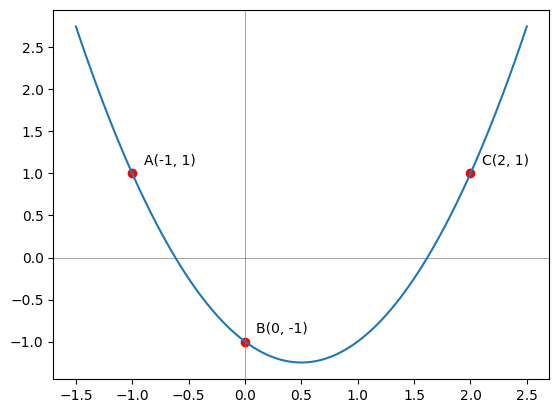

In [7]:
import matplotlib.pyplot as plt
plt.axvline(x=0, color="gray", linewidth=0.5)
plt.axhline(y=0, color="gray", linewidth=0.5)

x = np.linspace(-1.5, 2.5, 100)
y = parabol(x, a=1, b=-1, c=-1)
plt.plot(x, y)

plabels = "ABC"
pxs = [-1, 0, 2]
pys = [1, -1, 1]
plt.scatter(pxs, pys, color="red")
for l, x, y in zip(plabels, pxs, pys):
   plt.text(x + 0.1, y + 0.1, f'{l}({x}, {y})')

plt.show()

## Vài ví dụ trong slide "System of linear equations"

### Khử Gauss và Gauss-Jordan

In [8]:
A = sp.Matrix([
    [0, 0, -2, 0, 7, 12],
    [2, 4, -10, 6, 12, 28],
    [2, 4, -5, 6, -5, -1]
])
A

⎡0  0  -2   0  7   12⎤
⎢                    ⎥
⎢2  4  -10  6  12  28⎥
⎢                    ⎥
⎣2  4  -5   6  -5  -1⎦

In [9]:
A.echelon_form()

⎡2  4  -10  6  12  28⎤
⎢                    ⎥
⎢0  0  -2   0  7   12⎥
⎢                    ⎥
⎣0  0   0   0  -2  -4⎦

In [10]:
A.rref()

⎛⎡1  2  0  3  0  7⎤           ⎞
⎜⎢                ⎥           ⎟
⎜⎢0  0  1  0  0  1⎥, (0, 2, 4)⎟
⎜⎢                ⎥           ⎟
⎝⎣0  0  0  0  1  2⎦           ⎠

*Lưu ý:* dạng bậc thang (row echelon form) là không duy nhất, dạng bậc thang rút gọn (reduced row echelon form) là duy nhất.

### Giải hệ PTTT

In [11]:
A = sp.Matrix([
    [0, 0, -2, 0, 7, 12],
    [2, 4, -10, 6, 12, 28],
    [2, 4, -5, 6, -5, -1]
])
A

⎡0  0  -2   0  7   12⎤
⎢                    ⎥
⎢2  4  -10  6  12  28⎥
⎢                    ⎥
⎣2  4  -5   6  -5  -1⎦

In [12]:
sp.linsolve(A, sp.symbols([f"x{i}" for i in range(1, 6)]))